## Imports

In [16]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [17]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [18]:
df = pd.read_csv('thoracic_all_psm_open.csv')

In [19]:
df.shape

(2082, 37)

In [20]:
df.head()

personid                           encounterid  \
0  30718f09-131b-44e5-9b95-6f0210910417  695a03a3-4831-4447-a352-66efdc1e42aa   
1  36b24ccf-c48e-4ab6-8b12-d6e7d5dce01a  fec836c2-9878-4a8f-846d-661fc2ed0507   
2  517c0a03-8095-4c93-a966-81880d7d23a2  6e0c8cf1-54e8-4808-b167-79500e0c3969   
3  531f5276-4581-4ccb-85c4-f4229435e6b5  75b0dde2-c39e-4d86-9c44-f35a07292ad7   
4  6cf2bb8f-691a-44ad-803f-9d22be115d58  10bcaeb8-374f-4862-aa10-9aea1f06f37e   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              0             0        0    1  17.972222   
1            1              0             0        1    0   3.179861   
2            0              0             0        0    0   7.333021   
3            0              0             0        0    0   0.148611   
4            0              0             0        0    1   4.989410   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex  \
0                 0                 0.0                  49  74.0   F   
1                 0                 0.0                  21  52.0   F   
2                 0                 0.0                  81   9.0   F   
3                 1                 NaN                   0  20.0   M   
4                 0                 0.0                  85  44.0   M   

      race  CCI  preop_hypotension  postop_hypotension  MAKE_90  \
0    White    2                  0                   0        1   
1  Unknown    2                  1                   0        0   
2    White    0                  0                   0        0   
3    White    0                  0                   0        1   
4    Black    0                  0                   0        0   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            NaN                       Normal             NaN       0.98   
1            NaN                       Normal             NaN       1.00   
2            NaN                       Normal             NaN        NaN   
3            NaN                       Normal             NaN        NaN   
4            NaN                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                   Normal        NaN                  Unknown            0   
1                   Normal       0.66                   Normal            0   
2                  Unknown       0.53                   Normal            0   
3                  Unknown       1.23                   Normal            0   
4                  Unknown       0.61                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            0     0                0          0   62.987680   
1           0.0            0     4                0          0  101.562905   
2           0.0            0     4                0          0  147.659237   
3           1.0            1     8                0          0   83.982345   
4           1.0            0     0                0          0  140.764322   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0  Early Kidney Disease    0      11.7                  >= 9.0        1  
1                Normal    0      13.8                  >= 9.0        1  
2                Normal    0      13.8                  >= 9.0        1  
3  Early Kidney Disease    0      14.2                  >= 9.0        1  
4                Normal    0       8.2               8.0 - 8.9        1

In [21]:
df = df[df['non_elective'] == 1]

In [22]:
df.shape

(1094, 37)

In [23]:
df.head()

personid                           encounterid  \
0  30718f09-131b-44e5-9b95-6f0210910417  695a03a3-4831-4447-a352-66efdc1e42aa   
3  531f5276-4581-4ccb-85c4-f4229435e6b5  75b0dde2-c39e-4d86-9c44-f35a07292ad7   
4  6cf2bb8f-691a-44ad-803f-9d22be115d58  10bcaeb8-374f-4862-aa10-9aea1f06f37e   
5  77c3c2c8-0a69-4bec-ba9e-7c83c49ac64d  f09ad619-f579-4eb4-a658-6b074b51f724   
6  78b8d2b0-e5d8-45cf-9815-bcb71b5fc498  fc0fd41c-c297-4300-aaf1-9a103c211861   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              0             0        0    1  17.972222   
3            0              0             0        0    0   0.148611   
4            0              0             0        0    1   4.989410   
5            0              0             0        0    0  10.947894   
6            0              0             0        0    0   9.019016   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex   race  \
0                 0                 0.0                  49  74.0   F  White   
3                 1                 NaN                   0  20.0   M  White   
4                 0                 0.0                  85  44.0   M  Black   
5                 0                 1.0                  14  29.0   M  Other   
6                 0                 0.0                  80   4.0   F  White   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    2                  0                   0        1            NaN   
3    0                  0                   0        1            NaN   
4    0                  0                   0        0            NaN   
5    1                  0                   0        1            3.6   
6    0                  0                   0        0            NaN   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                       Normal             NaN       0.98   
3                       Normal             NaN        NaN   
4                       Normal             NaN        NaN   
5                       Normal             NaN        NaN   
6                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                   Normal        NaN                  Unknown            0   
3                  Unknown       1.23                   Normal            0   
4                  Unknown       0.61                   Normal            0   
5                  Unknown       0.71                   Normal            0   
6                  Unknown       0.28                      Low            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            0     0                0          0   62.987680   
3           1.0            1     8                0          0   83.982345   
4           1.0            0     0                0          0  140.764322   
5           1.0            0     5                0          0  126.786732   
6           1.0            0     5                0          0  188.662744   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0  Early Kidney Disease    0      11.7                  >= 9.0        1  
3  Early Kidney Disease    0      14.2                  >= 9.0        1  
4                Normal    0       8.2               8.0 - 8.9        1  
5                Normal    0      15.5                  >= 9.0        1  
6                Normal    0       9.4                  >= 9.0        1

In [24]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification', 'open_pr'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 2080
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      1094 non-null   object 
 1   encounterid                   1094 non-null   object 
 2   pre_albumin                   1094 non-null   int64  
 3   early_albumin                 1094 non-null   int64  
 4   late_albumin                  1094 non-null   int64  
 5   albumin                       1094 non-null   int64  
 6   ICU                           1094 non-null   int64  
 7   LOS_days                      1094 non-null   float64
 8   90_day_mortality              1094 non-null   int64  
 9   90_day_readmission            1005 non-null   float64
 10  hospital_free_days            1094 non-null   int64  
 11  age                           1092 non-null   float64
 12  sex                           1091 non-null   object 
 13  rac

In [26]:
df.isnull().sum()

personid                          0
encounterid                       0
pre_albumin                       0
early_albumin                     0
late_albumin                      0
albumin                           0
ICU                               0
LOS_days                          0
90_day_mortality                  0
90_day_readmission               89
hospital_free_days                0
age                               2
sex                               3
race                             45
CCI                               0
preop_hypotension                 0
postop_hypotension                0
MAKE_90                           0
preop_albumin                   807
preop_albumin_classification      0
postop_albumin                  921
preop_inr                       697
preop_inr_classification          0
preop_scr                       302
preop_scr_classification          0
transfusion                       0
non_elective                      0
vasopressor                 

In [27]:
df.early_albumin.value_counts()

0    1066
1      28
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [28]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    28.000000
mean     19.922279
std      16.701169
min       0.201551
25%       7.970492
50%      15.925347
75%      29.580035
max      70.946620
Name: LOS_days, dtype: float64

In [29]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    1066.000000
mean       22.614991
std        28.080481
min         0.098611
25%         9.255153
50%        15.176736
75%        25.100868
max       533.512500
Name: LOS_days, dtype: float64

In [30]:
df[df['albumin'] == 1].CCI.describe()

count    413.000000
mean       2.651332
std        2.551314
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       14.000000
Name: CCI, dtype: float64

In [31]:
df[df['albumin'] == 0].CCI.describe()

count    681.000000
mean       1.998532
std        2.355531
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       14.000000
Name: CCI, dtype: float64

In [32]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    24
1     4
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 14.285714285714285


In [33]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    981
1     85
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 7.973733583489681


In [34]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    18
1.0     6
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 25.0


In [35]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    632
1.0    349
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 35.57594291539245


In [36]:
df.head()

personid                           encounterid  \
0  30718f09-131b-44e5-9b95-6f0210910417  695a03a3-4831-4447-a352-66efdc1e42aa   
3  531f5276-4581-4ccb-85c4-f4229435e6b5  75b0dde2-c39e-4d86-9c44-f35a07292ad7   
4  6cf2bb8f-691a-44ad-803f-9d22be115d58  10bcaeb8-374f-4862-aa10-9aea1f06f37e   
5  77c3c2c8-0a69-4bec-ba9e-7c83c49ac64d  f09ad619-f579-4eb4-a658-6b074b51f724   
6  78b8d2b0-e5d8-45cf-9815-bcb71b5fc498  fc0fd41c-c297-4300-aaf1-9a103c211861   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              0             0        0    1  17.972222   
3            0              0             0        0    0   0.148611   
4            0              0             0        0    1   4.989410   
5            0              0             0        0    0  10.947894   
6            0              0             0        0    0   9.019016   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex   race  \
0                 0                 0.0                  49  74.0   F  White   
3                 1                 NaN                   0  20.0   M  White   
4                 0                 0.0                  85  44.0   M  Black   
5                 0                 1.0                  14  29.0   M  Other   
6                 0                 0.0                  80   4.0   F  White   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    2                  0                   0        1            NaN   
3    0                  0                   0        1            NaN   
4    0                  0                   0        0            NaN   
5    1                  0                   0        1            3.6   
6    0                  0                   0        0            NaN   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                       Normal             NaN       0.98   
3                       Normal             NaN        NaN   
4                       Normal             NaN        NaN   
5                       Normal             NaN        NaN   
6                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                   Normal        NaN                  Unknown            0   
3                  Unknown       1.23                   Normal            0   
4                  Unknown       0.61                   Normal            0   
5                  Unknown       0.71                   Normal            0   
6                  Unknown       0.28                      Low            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            0     0                0          0   62.987680   
3           1.0            1     8                0          0   83.982345   
4           1.0            0     0                0          0  140.764322   
5           1.0            0     5                0          0  126.786732   
6           1.0            0     5                0          0  188.662744   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0  Early Kidney Disease    0      11.7                  >= 9.0        1  
3  Early Kidney Disease    0      14.2                  >= 9.0        1  
4                Normal    0       8.2               8.0 - 8.9        1  
5                Normal    0      15.5                  >= 9.0        1  
6                Normal    0       9.4                  >= 9.0        1

In [37]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [38]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']]

In [39]:
df_a24.head()

personid                           encounterid  \
0  30718f09-131b-44e5-9b95-6f0210910417  695a03a3-4831-4447-a352-66efdc1e42aa   
3  531f5276-4581-4ccb-85c4-f4229435e6b5  75b0dde2-c39e-4d86-9c44-f35a07292ad7   
4  6cf2bb8f-691a-44ad-803f-9d22be115d58  10bcaeb8-374f-4862-aa10-9aea1f06f37e   
5  77c3c2c8-0a69-4bec-ba9e-7c83c49ac64d  f09ad619-f579-4eb4-a658-6b074b51f724   
6  78b8d2b0-e5d8-45cf-9815-bcb71b5fc498  fc0fd41c-c297-4300-aaf1-9a103c211861   

   pre_albumin  early_albumin  late_albumin  ICU   LOS_days  90_day_mortality  \
0            0              0             0    1  17.972222                 0   
3            0              0             0    0   0.148611                 1   
4            0              0             0    1   4.989410                 0   
5            0              0             0    0  10.947894                 0   
6            0              0             0    0   9.019016                 0   

   90_day_readmission  hospital_free_days  vasopressor sex   race  \
0                 0.0                  49            0   F  White   
3                 NaN                   0            1   M  White   
4                 0.0                  85            0   M  Black   
5                 1.0                  14            0   M  Other   
6                 0.0                  80            0   F  White   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   0        1            NaN                       Normal   
3                   0        1            NaN                       Normal   
4                   0        0            NaN                       Normal   
5                   0        1            3.6                       Normal   
6                   0        0            NaN                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN       0.98                   Normal        NaN   
3             NaN        NaN                  Unknown       1.23   
4             NaN        NaN                  Unknown       0.61   
5             NaN        NaN                  Unknown       0.71   
6             NaN        NaN                  Unknown       0.28   

  preop_scr_classification  transfusion  non_elective        eGFR  \
0                  Unknown            0           1.0   62.987680   
3                   Normal            0           1.0   83.982345   
4                   Normal            0           1.0  140.764322   
5                   Normal            0           1.0  126.786732   
6                      Low            0           1.0  188.662744   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0  Early Kidney Disease    0      11.7                  >= 9.0        1  
3  Early Kidney Disease    0      14.2                  >= 9.0        1  
4                Normal    0       8.2               8.0 - 8.9        1  
5                Normal    0      15.5                  >= 9.0        1  
6                Normal    0       9.4                  >= 9.0        1

In [40]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr'], inplace=True)

In [41]:
df.shape

(1094, 8)

In [42]:
df.head()

encounterid  albumin   age  CCI  \
0  695a03a3-4831-4447-a352-66efdc1e42aa        0  74.0    2   
3  75b0dde2-c39e-4d86-9c44-f35a07292ad7        0  20.0    0   
4  10bcaeb8-374f-4862-aa10-9aea1f06f37e        0  44.0    0   
5  f09ad619-f579-4eb4-a658-6b074b51f724        0  29.0    1   
6  fc0fd41c-c297-4300-aaf1-9a103c211861        0   4.0    0   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                  0     0                0          0  
3                  0     8                0          0  
4                  0     0                0          0  
5                  0     5                0          0  
6                  0     5                0          0

In [43]:
df.isnull().sum()

encounterid          0
albumin              0
age                  2
CCI                  0
preop_hypotension    0
NEWS                 0
bl_hypertension      0
preop_MAP            0
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
df.shape

(1092, 8)

In [46]:
df.albumin.value_counts()

0    679
1    413
Name: albumin, dtype: int64

In [47]:
df.head()

encounterid  albumin   age  CCI  \
0  695a03a3-4831-4447-a352-66efdc1e42aa        0  74.0    2   
3  75b0dde2-c39e-4d86-9c44-f35a07292ad7        0  20.0    0   
4  10bcaeb8-374f-4862-aa10-9aea1f06f37e        0  44.0    0   
5  f09ad619-f579-4eb4-a658-6b074b51f724        0  29.0    1   
6  fc0fd41c-c297-4300-aaf1-9a103c211861        0   4.0    0   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
0                  0     0                0          0  
3                  0     8                0          0  
4                  0     0                0          0  
5                  0     5                0          0  
6                  0     5                0          0

## Initialize PsmPy Class

In [48]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [49]:
%%time
psm.logistic_ps(balance = True)

Wall time: 387 ms


In [50]:
df_psm = psm.predicted_data

In [51]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  4e2e12ce-4814-4e82-83f1-c89d162b6dda  46.0    1                  0     4   
1  fe429d0f-190a-4b5f-bb9d-ee6df5d2ad9f  53.0    2                  0     5   
2  f5688149-0633-4206-8dbf-dc5b89677b75  54.0    0                  0     2   
3  6c880a8c-3c46-471c-b91c-3efef59d2055  23.0    3                  0     6   
4  0a27898e-7a86-4d24-9301-889f7103a697  67.0    4                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.479551         -0.081841        1  
1                1          0          0.530359          0.121586        1  
2                0          0          0.390039         -0.447150        1  
3                0          0          0.497604         -0.009584        1  
4                1          0          0.562547          0.251505        1

## Plot the propensity score / propensity logits

In [52]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 1.01 s


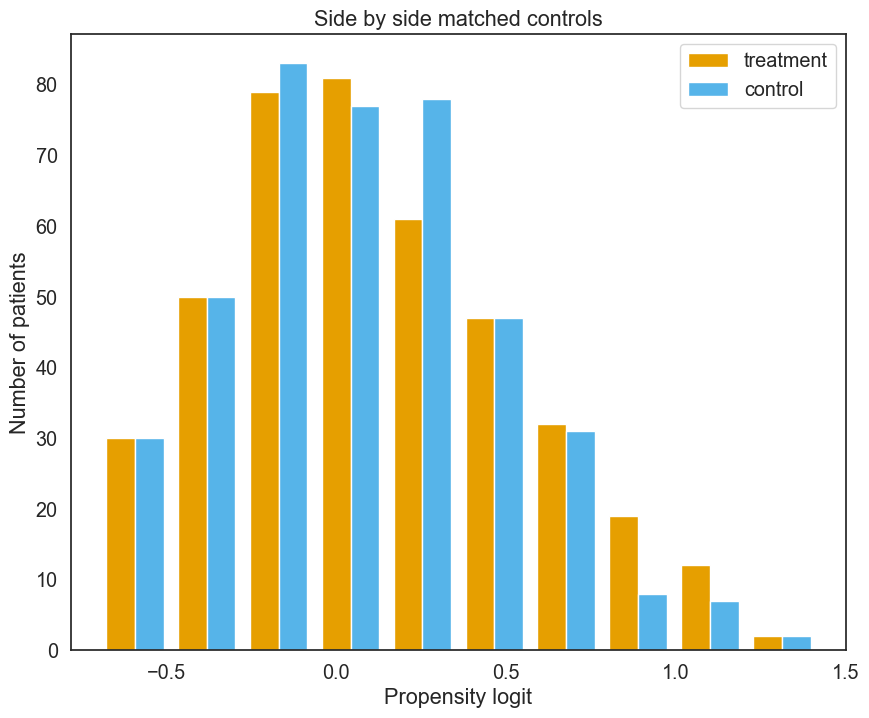

In [53]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

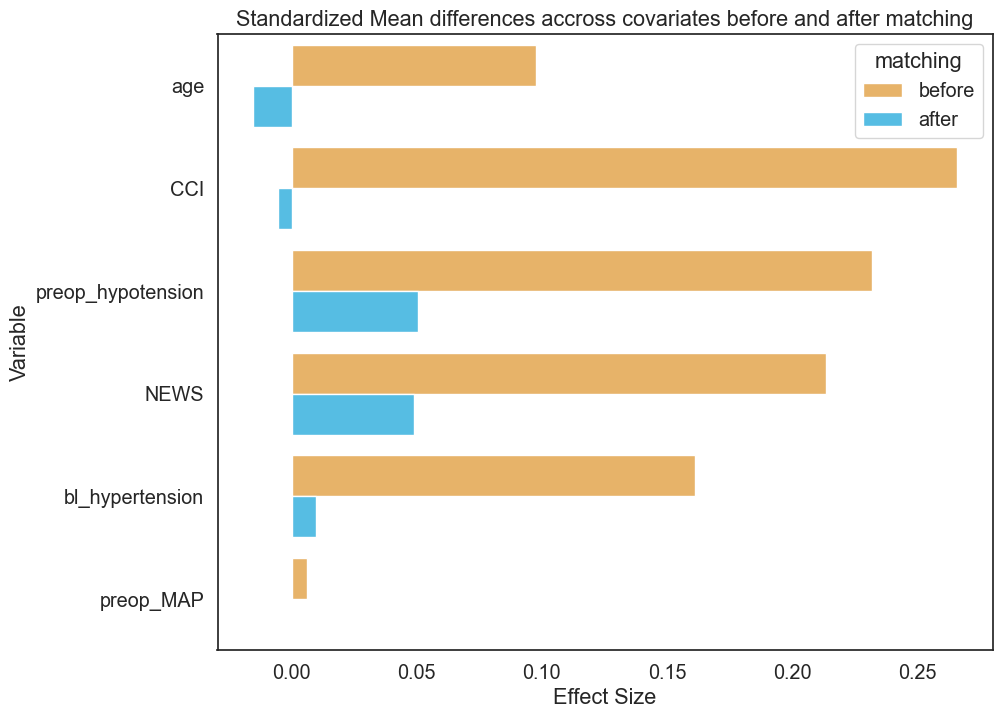

In [54]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [55]:
matched_df = psm.df_matched

In [56]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  4e2e12ce-4814-4e82-83f1-c89d162b6dda  46.0    1                  0     4   
1  fe429d0f-190a-4b5f-bb9d-ee6df5d2ad9f  53.0    2                  0     5   
2  f5688149-0633-4206-8dbf-dc5b89677b75  54.0    0                  0     2   
3  6c880a8c-3c46-471c-b91c-3efef59d2055  23.0    3                  0     6   
4  0a27898e-7a86-4d24-9301-889f7103a697  67.0    4                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.479551         -0.081841        1  
1                1          0          0.530359          0.121586        1  
2                0          0          0.390039         -0.447150        1  
3                0          0          0.497604         -0.009584        1  
4                1          0          0.562547          0.251505        1

In [57]:
matched_df.shape

(826, 10)

## Matched Ids

In [58]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  4e2e12ce-4814-4e82-83f1-c89d162b6dda  82bd101f-7db0-4fa5-895b-f1481368bc01
1  fe429d0f-190a-4b5f-bb9d-ee6df5d2ad9f  3e06f059-48be-43df-873b-2e358a4c7300
2  f5688149-0633-4206-8dbf-dc5b89677b75  18eb6f75-d526-4984-a129-7af6f79995cc
3  6c880a8c-3c46-471c-b91c-3efef59d2055  3c799d2f-a771-4418-a957-132790de8d88
4  0a27898e-7a86-4d24-9301-889f7103a697  9601428c-f45c-44ce-90c4-c76be88bf471

## Effect sizes per variables

In [59]:
psm.effect_size

Variable matching  Effect Size
0                 age   before     0.097708
1                 age    after    -0.015540
2                 CCI   before     0.266004
3                 CCI    after    -0.005605
4   preop_hypotension   before     0.232008
5   preop_hypotension    after     0.050465
6                NEWS   before     0.213679
7                NEWS    after     0.049015
8     bl_hypertension   before     0.161309
9     bl_hypertension    after     0.009694
10          preop_MAP   before     0.006280
11          preop_MAP    after     0.000000

## Explore Matched df

In [60]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  4e2e12ce-4814-4e82-83f1-c89d162b6dda  46.0    1                  0     4   
1  fe429d0f-190a-4b5f-bb9d-ee6df5d2ad9f  53.0    2                  0     5   
2  f5688149-0633-4206-8dbf-dc5b89677b75  54.0    0                  0     2   
3  6c880a8c-3c46-471c-b91c-3efef59d2055  23.0    3                  0     6   
4  0a27898e-7a86-4d24-9301-889f7103a697  67.0    4                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.479551         -0.081841        1  
1                1          0          0.530359          0.121586        1  
2                0          0          0.390039         -0.447150        1  
3                0          0          0.497604         -0.009584        1  
4                1          0          0.562547          0.251505        1

In [61]:
matched_df.albumin.value_counts()

1    413
0    413
Name: albumin, dtype: int64

In [62]:
matched_df.shape

(826, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [63]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [64]:
f_df.shape

(826, 39)

In [65]:
f_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  4e2e12ce-4814-4e82-83f1-c89d162b6dda  46.0    1                  0     4   
1  fe429d0f-190a-4b5f-bb9d-ee6df5d2ad9f  53.0    2                  0     5   
2  f5688149-0633-4206-8dbf-dc5b89677b75  54.0    0                  0     2   
3  6c880a8c-3c46-471c-b91c-3efef59d2055  23.0    3                  0     6   
4  0a27898e-7a86-4d24-9301-889f7103a697  67.0    4                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  \
0                1          0          0.479551         -0.081841        1   
1                1          0          0.530359          0.121586        1   
2                0          0          0.390039         -0.447150        1   
3                0          0          0.497604         -0.009584        1   
4                1          0          0.562547          0.251505        1   

                               personid  pre_albumin  early_albumin  \
0  baf63587-e51e-49d7-9d2b-7650a729e87a            0              0   
1  3d029eff-de52-46b2-a164-4a5f7e8136af            0              0   
2  69f44d61-abf0-4940-ad40-6ddeeec7c4a7            0              0   
3  73b843e2-2cf9-41f8-93a6-ea2b6d3fba34            0              0   
4  437c0b0f-f186-4439-9598-934d628a196e            0              0   

   late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0             1    1  10.649306                 0                 0.0   
1             1    0  26.305556                 0                 1.0   
2             1    0  25.931250                 0                 1.0   
3             1    1  28.831690                 0                 0.0   
4             1    0  27.225000                 0                 0.0   

   hospital_free_days  vasopressor sex     race  postop_hypotension  MAKE_90  \
0                  79            0   M  Unknown                   1        1   
1                  29            0   M    Other                   0        1   
2                  58            0   M    White                   0        0   
3                  24            0   M    Other                   0        1   
4                  14            0   M      NaN                   0        0   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            2.6                          Low             2.6       1.29   
1            2.8                          Low             NaN       1.26   
2            NaN                       Normal             NaN        NaN   
3            NaN                       Normal             NaN        NaN   
4            3.2                          Low             NaN       1.08   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                   Normal       0.80                   Normal            0   
1                   Normal       0.81                   Normal            0   
2                  Unknown        NaN                  Unknown            0   
3                  Unknown       0.59                   Normal            0   
4                   Normal       0.66                   Normal            0   

   non_elective        eGFR eGFR_classification  LVR  preop_hb  \
0           1.0  107.129291              Normal    0      17.6   
1           1.0  101.469521              Normal    0      15.0   
2           1.0  109.607342              Normal    0       9.4   
3           1.0  142.700443              Normal    0      14.0   
4           1.0  100.041426              Normal    0      14.5   

  preop_hb_classification  open_pr  
0                  >= 9.0        1  
1                  >= 9.0        1  
2                  >= 9.0        1  
3                  >= 9.0        1  
4                  >= 9.0        1

In [66]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [67]:
f_df.albumin.value_counts()

1    413
0    413
Name: albumin, dtype: int64

In [68]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    28.000000
mean     19.922279
std      16.701169
min       0.201551
25%       7.970492
50%      15.925347
75%      29.580035
max      70.946620
Name: LOS_days, dtype: float64

In [69]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    798.000000
mean      24.640583
std       30.969468
min        0.098611
25%       10.651562
50%       16.094097
75%       28.432292
max      533.512500
Name: LOS_days, dtype: float64

In [70]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [71]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    24
1     4
Name: 90_day_mortality, dtype: int64


In [72]:
mrate(m)

30 Day Mortality Rate (pct): 14.285714285714285


In [73]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    718
1     80
Name: 90_day_mortality, dtype: int64


In [74]:
mrate(m1)

30 Day Mortality Rate (pct): 10.025062656641603


In [75]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

0.0    18
1.0     6
Name: 90_day_readmission, dtype: int64


In [76]:
rrate(r)

30 Day Readmission Rate (pct): 25.0


In [77]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    450
1.0    268
Name: 90_day_readmission, dtype: int64


In [78]:
rrate(r1)

30 Day Readmission Rate (pct): 37.32590529247911


In [79]:
a_df = f_df[f_df['albumin'] == 1]
na_df = f_df[f_df['albumin'] == 0]

In [80]:
a_df['CCI'].describe()

count    413.000000
mean       2.651332
std        2.551314
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       14.000000
Name: CCI, dtype: float64

In [81]:
na_df['CCI'].describe()

count    413.000000
mean       2.665860
std        2.631903
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       14.000000
Name: CCI, dtype: float64

In [82]:
a_df['age'].describe()

count    413.000000
mean      51.087167
std       19.765793
min        0.000000
25%       38.000000
50%       55.000000
75%       65.000000
max       88.000000
Name: age, dtype: float64

In [83]:
na_df['age'].describe()

count    413.000000
mean      51.399516
std       20.429198
min        0.000000
25%       39.000000
50%       56.000000
75%       66.000000
max       89.000000
Name: age, dtype: float64

In [84]:
a_df['preop_hypotension'].value_counts()

0    335
1     78
Name: preop_hypotension, dtype: int64

In [85]:
na_df['preop_hypotension'].value_counts()

0    343
1     70
Name: preop_hypotension, dtype: int64

In [86]:
a_df['NEWS'].describe()

count    413.000000
mean       3.634383
std        3.241041
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       15.000000
Name: NEWS, dtype: float64

In [87]:
na_df['NEWS'].describe()

count    413.000000
mean       3.481840
std        2.977714
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       15.000000
Name: NEWS, dtype: float64

In [88]:
a_df['bl_hypertension'].value_counts()

0    219
1    194
Name: bl_hypertension, dtype: int64

In [89]:
na_df['bl_hypertension'].value_counts()

0    221
1    192
Name: bl_hypertension, dtype: int64

In [90]:
a_df['preop_MAP'].value_counts()

0    411
1      2
Name: preop_MAP, dtype: int64

In [91]:
na_df['preop_MAP'].value_counts()

0    411
1      2
Name: preop_MAP, dtype: int64

In [92]:
f_df.to_csv('thoracic_procedures_ps_matched_221018.csv', index=False)